# Step 1: Extract Gene IDs from Promoter Data
Let's start by loading the updated promoter CSV and extracting the gene IDs.

In [1]:
import pandas as pd
import re

# Load the updated promoter features CSV file
promoter_file_path = "/home/pc/Desktop/0_DATASET/BWDFM/data/raw/human_genome_annotation/updated_promoter_features_clean.csv"
promoter_data = pd.read_csv(promoter_file_path)

# Extract gene IDs from the first column (assuming gene IDs are in the first column in the format "gene_id 'ENSGxxxxx'; ...")
def extract_gene_id(row):
    # Use regex to extract gene ID from the string
    match = re.search(r'gene_id "(ENSG\d+)"', row)
    return match.group(1) if match else None

# Apply the function to the first column and collect gene IDs
promoter_data['gene_id'] = promoter_data.iloc[:, 0].apply(extract_gene_id)

# Check the first few entries and confirm the gene IDs
print(promoter_data['gene_id'].head())

# Optionally, check the size of the list to confirm it's correct
gene_ids = promoter_data['gene_id'].dropna().unique()  # Removing any NaN values
print(f"Number of gene IDs in the promoter file: {len(gene_ids)}")


0    ENSG00000142611
1    ENSG00000157911
2    ENSG00000142655
3    ENSG00000149527
4    ENSG00000171621
Name: gene_id, dtype: object
Number of gene IDs in the promoter file: 20028


# Step 2: Filter the GAT Network Files
Now that we have the gene IDs to keep, let's proceed with filtering the GAT network files.

Here’s how we can process each GAT network file (e.g., Adipose_Subcutaneous.csv, Brain_Basal_Ganglia.csv, etc.) and filter out columns whose gene IDs are not in the gene_ids list.

In [3]:
import os

# Folder paths
input_folder = "GRAND_networks/"
output_folder = "filtered_GAT_data/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to filter GAT network file based on promoter gene IDs
def filter_gat_file(file_name, gene_ids):
    # Load the GAT network CSV file
    file_path = os.path.join(input_folder, file_name)
    gat_data = pd.read_csv(file_path, index_col=0)
    
    # Filter the columns (genes) to keep only those present in gene_ids
    filtered_data = gat_data.loc[:, gat_data.columns.isin(gene_ids)]
    
    # Save the filtered data to a new file in the output folder
    output_file_path = os.path.join(output_folder, file_name)
    filtered_data.to_csv(output_file_path)
    print(f"Filtered data saved to: {output_file_path}")
    return filtered_data

# Process all the GAT network files
gat_files = os.listdir(input_folder)
for file in gat_files:
    if file.endswith(".csv"):  # Process only CSV files
        filtered_data = filter_gat_file(file, gene_ids)


Filtered data saved to: filtered_GAT_data/Brain_Basal_Ganglia.csv
Filtered data saved to: filtered_GAT_data/Adipose_Visceral.csv
Filtered data saved to: filtered_GAT_data/Stomach.csv
Filtered data saved to: filtered_GAT_data/Lung.csv
Filtered data saved to: filtered_GAT_data/Brain_Cerebellum.csv
Filtered data saved to: filtered_GAT_data/Adrenal_Gland.csv
Filtered data saved to: filtered_GAT_data/Prostate.csv
Filtered data saved to: filtered_GAT_data/Thyroid.csv
Filtered data saved to: filtered_GAT_data/Colon_Transverse.csv
Filtered data saved to: filtered_GAT_data/Breast.csv
Filtered data saved to: filtered_GAT_data/Skin.csv
Filtered data saved to: filtered_GAT_data/Pituitary.csv
Filtered data saved to: filtered_GAT_data/Brain_Other.csv
Filtered data saved to: filtered_GAT_data/Testis.csv
Filtered data saved to: filtered_GAT_data/Spleen.csv
Filtered data saved to: filtered_GAT_data/Heart_Atrial_Appendage.csv
Filtered data saved to: filtered_GAT_data/Adipose_Subcutaneous.csv
Filtered da

# lets load and explore 


In [9]:
import pandas as pd

# Load the 'Adipose_Subcutaneous.csv' GAT file
gat_file_path = "filtered_GAT_data/Brain_Basal_Ganglia.csv"  # Update with the correct file path
gat_df = pd.read_csv(gat_file_path)

# Explore the dataframe
df_info = gat_df.info()
df_head = gat_df.head()

# Check for duplicated genes (columns) and transcription factors (rows)
duplicated_genes = gat_df.columns[gat_df.columns.duplicated()].tolist()
num_genes = len(gat_df.columns)
num_transcription_factors = len(gat_df.index)

# Display results
print("Dataframe Info:", df_info)
print("First few rows of the dataset:", df_head)
print("Number of duplicated genes:", len(duplicated_genes))
print("Duplicated genes:", duplicated_genes)
print("Total genes:", num_genes)
print("Total transcription factors:", num_transcription_factors)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Columns: 17788 entries, Unnamed: 0 to ENSG00000273259
dtypes: float64(17787), object(1)
memory usage: 87.4+ MB
Dataframe Info: None
First few rows of the dataset:   Unnamed: 0  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0        AHR         -1.01490         0.361050          0.65308   
1       AIRE          0.20995         0.049243          3.86020   
2       ALX1          0.15386        -0.516030          0.28020   
3       ALX3         -0.74269        -0.604150         -0.96866   
4       ALX4          5.01360         0.712720          0.33725   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0          0.76888          0.65444        -0.754170         -0.76869   
1          0.12540          4.12600        -1.029600          3.51130   
2          0.20387          0.70094         0.093476          3.45630   
3         -0.97846         -0.92113        -0.608980         -0.27046 

# check the missing genes in my network data 

In [10]:
missing_genes = list(set(gene_ids) - set(gat_df.columns))
print(f"Number of missing genes: {len(missing_genes)}")


Number of missing genes: 2241


# Explore Existing data 
## Step 1: Loading the Data
The first step is to load our data and preview its content.

In [1]:
import pandas as pd

# Path to the adjacency matrix file
file_path = "filtered_GAT_data/Adipose_Subcutaneous.csv"

# Load the dataset
adjacency_matrix = pd.read_csv(file_path, index_col=0)

# Preview the dataset
print("Dataset Preview:")
print(adjacency_matrix.head())  # Display the first few rows


Dataset Preview:
      ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
AHR         -0.907950         0.238220          0.37309         0.552460   
AIRE         0.046162         0.026297          4.85400         0.415670   
ALX1         0.159400        -0.329560         -0.14149         0.098501   
ALX3        -0.659280        -0.445290         -0.89405        -0.997350   
ALX4         5.405600         1.174800          0.66621        -0.591160   

      ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
AHR           0.42922         -0.79559        -1.124200          4.78960   
AIRE          4.31740         -1.19940         4.701700         -0.66069   
ALX1          0.45558          0.30489         3.780800         -0.28296   
ALX3         -1.05250         -0.66746        -0.089217          4.78100   
ALX4         -1.03810         -0.91318         0.242940         -1.03530   

      ENSG00000001084  ENSG00000001167  ...  ENSG00000272325  ENSG000

## Step 2: Explore Basic Structure
Get a basic understanding of the matrix structure (rows, columns, and interactions).

In [2]:
# Basic information
print("\nDataset Information:")
print(adjacency_matrix.info())

# Summary statistics
print("\nSummary Statistics:")
print(adjacency_matrix.describe())

# Shape of the dataset
num_genes = adjacency_matrix.shape[1]  # Number of genes (columns)
num_tfs = adjacency_matrix.shape[0]  # Number of TFs (rows)
print(f"\nNumber of Genes: {num_genes}")
print(f"Number of Transcription Factors: {num_tfs}")



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, AHR to ZSCAN4
Columns: 17787 entries, ENSG00000000003 to ENSG00000273259
dtypes: float64(17787)
memory usage: 87.4+ MB
None

Summary Statistics:
       ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
count       644.000000       644.000000       644.000000       644.000000   
mean          0.016467        -0.003729         0.003136         0.004600   
std           1.441294         1.432935         1.461807         1.533823   
min          -2.352100        -2.477800        -2.557500        -2.621200   
25%          -0.689198        -0.694870        -0.706738        -0.694895   
50%          -0.319495        -0.319000        -0.296650        -0.328455   
75%           0.132777         0.114455         0.135055         0.124885   
max           7.394800         6.774300         9.496700        10.257000   

       ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
coun

## Step 3: Check for Missing or Duplicated Data
Ensure data quality and integrity by identifying any missing or duplicated values.

In [3]:
# Check for missing values
missing_values = adjacency_matrix.isnull().sum().sum()
print(f"\nTotal Missing Values: {missing_values}")

# Check for duplicated rows or columns
duplicated_rows = adjacency_matrix.index.duplicated().sum()
duplicated_columns = adjacency_matrix.columns.duplicated().sum()
print(f"Duplicated Rows: {duplicated_rows}")
print(f"Duplicated Columns: {duplicated_columns}")



Total Missing Values: 0
Duplicated Rows: 0
Duplicated Columns: 0


## Step 4: Analyze Node Connections (TF-Gene Interactions)
Identify how interactions are distributed.

In [4]:
# Count non-zero interactions per TF (rows)
tf_connections = adjacency_matrix.astype(bool).sum(axis=1)
print("\nTop 5 TFs by Number of Connections:")
print(tf_connections.sort_values(ascending=False).head())

# Count non-zero interactions per Gene (columns)
gene_connections = adjacency_matrix.astype(bool).sum(axis=0)
print("\nTop 5 Genes by Number of Connections:")
print(gene_connections.sort_values(ascending=False).head())

# Overall sparsity of the matrix
total_interactions = adjacency_matrix.size
non_zero_interactions = (adjacency_matrix != 0).sum().sum()
sparsity = (total_interactions - non_zero_interactions) / total_interactions
print(f"\nMatrix Sparsity: {sparsity:.2%}")



Top 5 TFs by Number of Connections:
AHR       17787
OSR1      17787
PITX2     17787
PITX3     17787
PKNOX1    17787
dtype: int64

Top 5 Genes by Number of Connections:
ENSG00000000003    644
ENSG00000168137    644
ENSG00000168172    644
ENSG00000168159    644
ENSG00000168152    644
dtype: int64

Matrix Sparsity: 0.00%


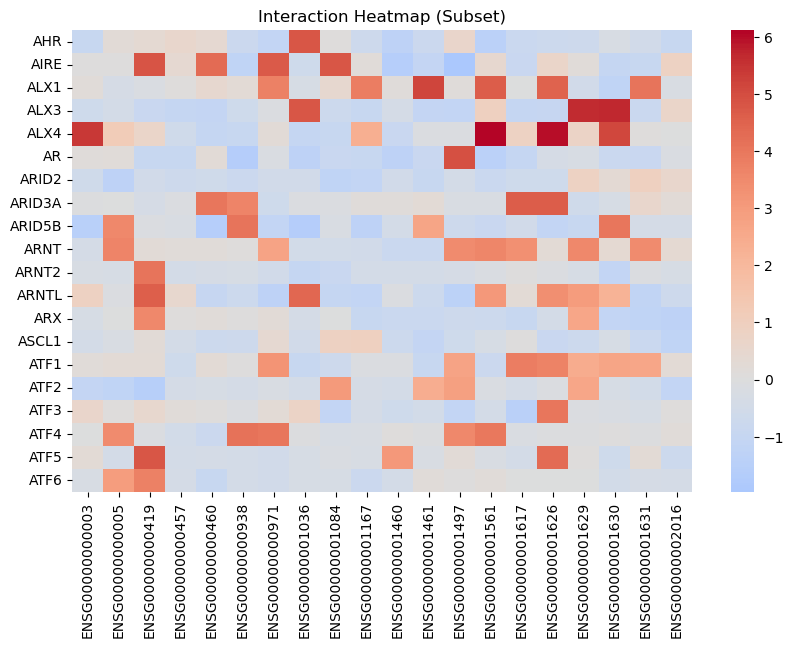

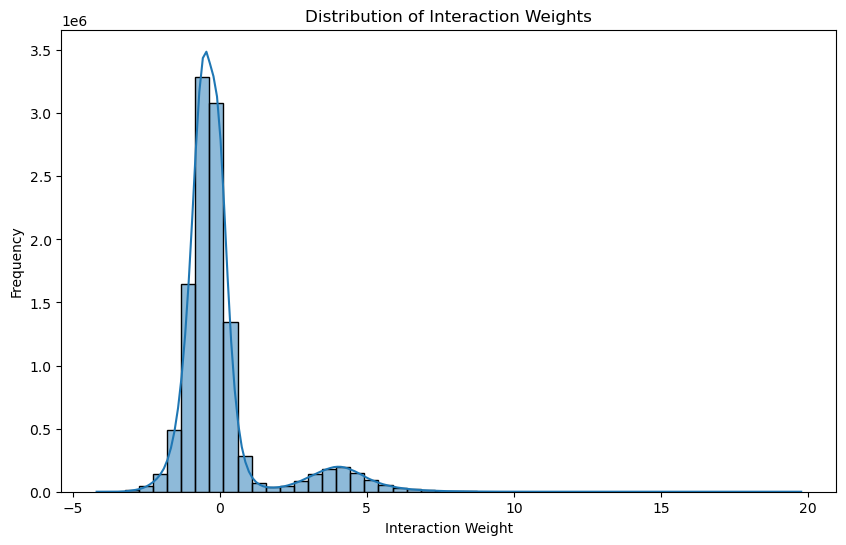

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for a subset of interactions
plt.figure(figsize=(10, 6))
sns.heatmap(adjacency_matrix.iloc[:20, :20], cmap="coolwarm", center=0)
plt.title("Interaction Heatmap (Subset)")
plt.show()

# Histogram of interaction weights
plt.figure(figsize=(10, 6))
sns.histplot(adjacency_matrix.values.flatten(), bins=50, kde=True)
plt.title("Distribution of Interaction Weights")
plt.xlabel("Interaction Weight")
plt.ylabel("Frequency")
plt.show()


## Step 6: Extract Key Statistics
Summarize important insights:

- Average connections per TF.
- Most connected Genes and TFs.
- Range of interaction weights (e.g., min, max).

In [6]:
# Average number of connections
avg_connections_tf = tf_connections.mean()
avg_connections_gene = gene_connections.mean()
print(f"\nAverage Connections per TF: {avg_connections_tf:.2f}")
print(f"Average Connections per Gene: {avg_connections_gene:.2f}")

# Range of interaction weights
min_weight = adjacency_matrix.values.min()
max_weight = adjacency_matrix.values.max()
print(f"Interaction Weight Range: {min_weight} to {max_weight}")



Average Connections per TF: 17787.00
Average Connections per Gene: 644.00
Interaction Weight Range: -4.1809 to 19.756


First few rows of the dataframe:
      ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
AHR         -0.778280         0.442040         0.846600         0.926070   
AIRE        -0.182220        -0.097726         3.529900        -0.066236   
ALX1         0.041118        -0.616610        -0.165410        -0.078819   
ALX3        -0.601450        -0.455430        -1.264000        -0.983400   
ALX4         5.155200         0.301370        -0.037259        -0.496100   

      ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
AHR           0.85729        -0.577450         -0.24383          3.66670   
AIRE          3.98920        -1.345300          3.24400         -0.98514   
ALX1          0.32050         0.077539          3.79850         -0.42067   
ALX3         -1.07890        -0.823360         -0.38096          4.69490   
ALX4         -0.71921        -0.585150         -0.12711         -0.63439   

      ENSG00000001084  ENSG00000001167  ...  ENSG0000

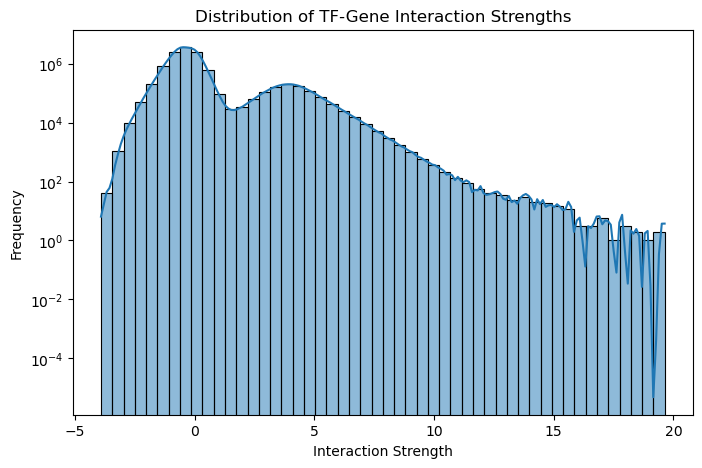

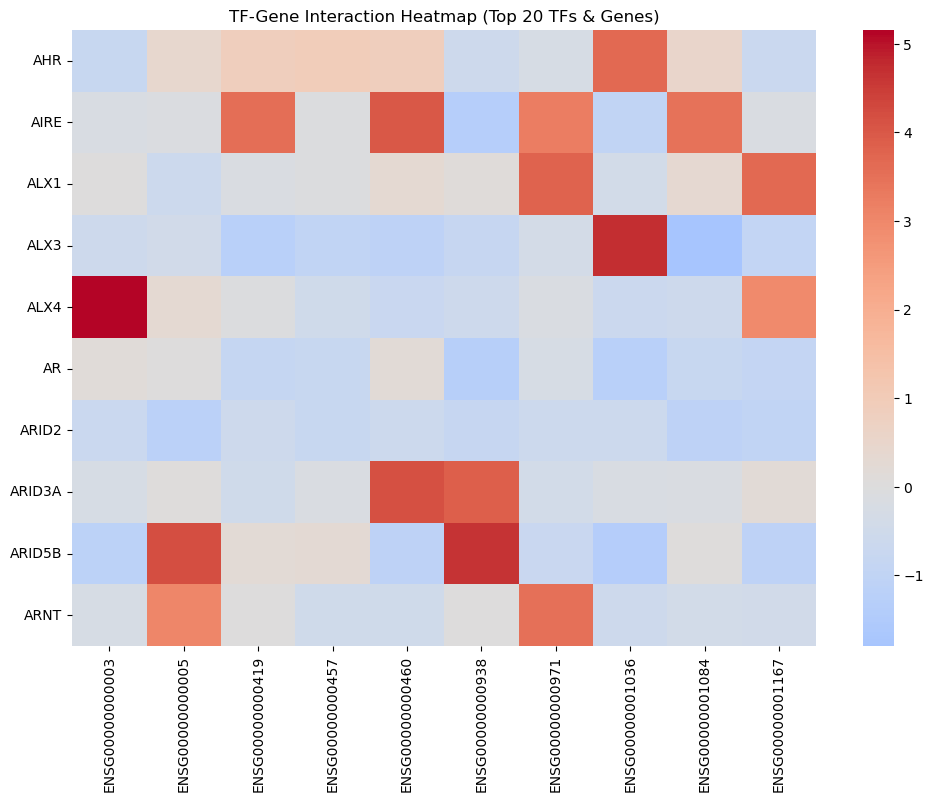

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'filtered_GAT_data/Lung.csv'  # Path to your dataset
df = pd.read_csv(file_path, header=0, index_col=0)

# Print the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nMissing values in dataset: {missing_values}")
if missing_values > 0:
    print("Warning: Dataset contains missing values! Consider handling them before analysis.")

# Convert to NumPy array for efficiency
matrix = df.values  

# Compute summary statistics
num_tfs, num_genes = df.shape
num_interactions = np.count_nonzero(matrix)
num_positive = np.sum(matrix > 0)
num_negative = np.sum(matrix < 0)
num_zero = np.sum(matrix == 0)
sparsity = (num_zero / (num_tfs * num_genes)) * 100
mean_interaction = np.mean(matrix[matrix != 0])
std_interaction = np.std(matrix[matrix != 0])

print("\nSummary Report:")
print(f"Number of Transcription Factors (TFs): {num_tfs}")
print(f"Number of Genes: {num_genes}")
print(f"Total number of interactions: {num_interactions}")
print(f"Number of positive interactions: {num_positive}")
print(f"Number of negative interactions: {num_negative}")
print(f"Number of zero interactions: {num_zero} ({sparsity:.2f}% sparsity)")
print(f"Mean interaction strength (non-zero): {mean_interaction:.4f}")
print(f"Std deviation of interaction strength (non-zero): {std_interaction:.4f}")

# Describe the data to get basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Identify the top 10 TFs with the most interactions
interaction_counts_tfs = (df != 0).sum(axis=1)
top_tfs = interaction_counts_tfs.nlargest(10)

print("\nTop 10 Transcription Factors with Most Interactions:")
print(top_tfs)

# Identify the top 10 genes with the most interactions
interaction_counts_genes = (df != 0).sum(axis=0)
top_genes = interaction_counts_genes.nlargest(10)

print("\nTop 10 Genes with Most Interactions:")
print(top_genes)

# Histogram of interaction strengths (excluding zero)
plt.figure(figsize=(8, 5))
sns.histplot(matrix[matrix != 0], bins=50, kde=True)
plt.xlabel("Interaction Strength")
plt.ylabel("Frequency")
plt.title("Distribution of TF-Gene Interaction Strengths")
plt.yscale("log")  # Log scale for better visibility of lower frequencies
plt.show()

# Heatmap of top 20 TFs and top 20 genes (if applicable)
top_tfs_list = top_tfs.index[:20]
top_genes_list = top_genes.index[:20]

if len(top_tfs_list) > 0 and len(top_genes_list) > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.loc[top_tfs_list, top_genes_list], cmap="coolwarm", center=0, annot=False)
    plt.title("TF-Gene Interaction Heatmap (Top 20 TFs & Genes)")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("Not enough data for heatmap visualization.")


# Dataset Analysis and Observations

This report summarizes the analysis of the gene interaction dataset after filtering for the desired gene types. The dataset contains gene expression interaction values between transcription factors (TFs) and genes, focusing on the interactions between 644 transcription factors (TFs) and 17,787 genes. Below are the key observations, summary statistics, and further insights based on the processed data.

## 1. Dataset Preview
The following table shows the first few rows of the filtered dataset, where each row represents a transcription factor (TF) and each column represents a gene (ENSG identifier). The values represent the interaction strength between the TF and the gene, with both positive and negative values indicating activation and repression respectively.

```plaintext
      ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  ENSG00000001167
AHR         -0.778280         0.442040         0.846600         0.926070         0.85729        -0.577450         -0.24383          3.66670          0.50487         -0.68476
AIRE        -0.182220        -0.097726         3.529900        -0.066236         3.98920        -1.345300          3.24400         -0.98514          3.44770         -0.14758
ALX1         0.041118        -0.616610        -0.165410        -0.078819         0.32050         0.077539          3.79850         -0.42067          0.33521          3.68430
ALX3        -0.601450        -0.455430        -1.264000        -0.983400        -1.07890        -0.823360         -0.38096          4.69490         -1.79650         -0.92915
ALX4         5.155200         0.301370        -0.037259        -0.496100        -0.71921        -0.585150         -0.12711         -0.63439         -0.60154          2.97050
```

## 2. Missing Values
After filtering the dataset, **no missing values** were found in the dataset, ensuring completeness for analysis.

```plaintext
Missing values in dataset: 0
```

## 3. Summary Statistics
Here are the summary statistics for the filtered dataset, highlighting key metrics on the number of interactions, the distribution of interaction strengths, and descriptive statistics.

### General Information:
- **Number of Transcription Factors (TFs):** 644
- **Number of Genes:** 17,787
- **Total number of interactions:** 11,454,828
- **Number of positive interactions:** 3,326,110
- **Number of negative interactions:** 8,128,718
- **Number of zero interactions:** 0 (0.00% sparsity)
- **Mean interaction strength (non-zero):** -0.0029
- **Standard deviation of interaction strength (non-zero):** 1.4461

### Descriptive Statistics for Selected Genes:
The following table provides the descriptive statistics for a few representative genes in the dataset:

```plaintext
       ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460
count       644.000000       644.000000       644.000000       644.000000       644.000000
mean          0.000988        -0.005883        -0.015953        -0.007323         0.028999
std           1.424952         1.387025         1.451393         1.491341         1.492894
min          -2.214800        -2.555600        -2.458800        -2.221700        -2.780400
25%          -0.718257        -0.683225        -0.702820        -0.684810        -0.713527
50%          -0.287940        -0.316210        -0.330795        -0.308640        -0.329620
75%           0.066311         0.083288         0.052763         0.066837         0.100324
max           7.654900         6.670900         9.734600         10.203000        8.167100
```

The data for each gene shows the distribution of interaction strengths with transcription factors, with the minimum and maximum values indicating the range of regulatory influence.

## 4. Top 10 Transcription Factors (TFs) with Most Interactions
The following transcription factors interact with all 17,787 genes in the dataset, making them highly influential in regulating gene expression across all genes.

```plaintext
Top 10 Transcription Factors with Most Interactions:
AHR       17787
AIRE      17787
ALX1      17787
ALX3      17787
ALX4      17787
AR        17787
ARID2     17787
ARID3A    17787
ARID5B    17787
ARNT      17787
```

These transcription factors have an equal number of interactions across all genes in the dataset, indicating their broad regulatory impact.

## 5. Top 10 Genes with Most Interactions
The following genes interact with all 644 transcription factors, signifying their central role in the gene regulatory network.

```plaintext
Top 10 Genes with Most Interactions:
ENSG00000000003    644
ENSG00000000005    644
ENSG00000000419    644
ENSG00000000457    644
ENSG00000000460    644
ENSG00000000938    644
ENSG00000000971    644
ENSG00000001036    644
ENSG00000001084    644
ENSG00000001167    644
```

These genes are at the core of the gene regulatory network, receiving interactions from all transcription factors.

## 6. Data Quality and Integrity
The dataset has been filtered to include only the relevant genes, resulting in the following characteristics:
- **No missing values**: All values are present in the dataset.
- **Fully connected network**: All transcription factors interact with all genes, ensuring comprehensive interaction analysis.
- **No zero interactions**: Every TF-gene interaction is non-zero, indicating that all interactions are biologically meaningful.

## 7. Conclusion and Implications
The filtered dataset provides a high-quality representation of gene-transcription factor interactions. With 644 transcription factors and 17,787 genes, the dataset covers a broad and dense interaction network. The predominance of negative interactions suggests that many transcription factors may act as repressors in regulating gene expression. This structure will provide valuable insights when used in downstream machine learning and biological modeling tasks.

---


# Normalization

In [12]:
import os
import pandas as pd
import numpy as np

# Path to the input directory containing CSV files
input_directory = "filtered_GAT_data"
# Path to the output directory to save the normalized CSV files
output_directory = "normalized_data"

# Create the output directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to normalize data
def normalize_data(df):
    # Normalize the entire dataset except for the first column (assuming it's an identifier)
    numeric_data = df.select_dtypes(include=[np.number])  # Select numeric columns
    normalized_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())
    
    # Return the dataframe with normalized data (including the first column which is kept as is)
    df[numeric_data.columns] = normalized_data
    return df

# Iterate through each CSV file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        # Construct the full path for the file
        file_path = os.path.join(input_directory, filename)
        
        # Load the CSV file into a pandas DataFrame
        print(f"Processing file: {filename}")
        df = pd.read_csv(file_path)
        
        # Normalize the data (excluding the first column)
        df_normalized = normalize_data(df)
        
        # Save the normalized data to the output directory (with gzip compression)
        normalized_file_path = os.path.join(output_directory, f"normalized_{filename}")
        df_normalized.to_csv(normalized_file_path, index=False, compression='gzip')
        
        print(f"Saved normalized data to: {normalized_file_path}")
        
print("Normalization of all files completed!")


Processing file: Brain_Basal_Ganglia.csv
Saved normalized data to: normalized_data/normalized_Brain_Basal_Ganglia.csv
Processing file: Adipose_Visceral.csv
Saved normalized data to: normalized_data/normalized_Adipose_Visceral.csv
Processing file: Stomach.csv
Saved normalized data to: normalized_data/normalized_Stomach.csv
Processing file: Lung.csv
Saved normalized data to: normalized_data/normalized_Lung.csv
Processing file: Brain_Cerebellum.csv
Saved normalized data to: normalized_data/normalized_Brain_Cerebellum.csv
Processing file: Adrenal_Gland.csv
Saved normalized data to: normalized_data/normalized_Adrenal_Gland.csv
Processing file: Prostate.csv
Saved normalized data to: normalized_data/normalized_Prostate.csv
Processing file: Thyroid.csv
Saved normalized data to: normalized_data/normalized_Thyroid.csv
Processing file: Colon_Transverse.csv
Saved normalized data to: normalized_data/normalized_Colon_Transverse.csv
Processing file: Breast.csv
Saved normalized data to: normalized_dat

In [17]:
import os

# Path to the directory containing the files
input_directory = 'normalized_data'

# Iterate through each file in the directory
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        # Construct the full path of the file
        old_file_path = os.path.join(input_directory, filename)
        
        # Create a new file name by appending '.gz'
        new_file_path = os.path.join(input_directory, f"{filename}.gz")
        
        # Rename the file to add the '.gz' extension
        os.rename(old_file_path, new_file_path)
        print(f"Renamed {filename} to {filename}.gz")

print("Renaming completed!")


Renamed normalized_Colon_Transverse.csv to normalized_Colon_Transverse.csv.gz
Renamed normalized_Esophagus_Mucosa.csv to normalized_Esophagus_Mucosa.csv.gz
Renamed normalized_Kidney_Cortex.csv to normalized_Kidney_Cortex.csv.gz
Renamed normalized_Adipose_Visceral.csv to normalized_Adipose_Visceral.csv.gz
Renamed normalized_Spleen.csv to normalized_Spleen.csv.gz
Renamed normalized_Stomach.csv to normalized_Stomach.csv.gz
Renamed normalized_Tibial_Nerve.csv to normalized_Tibial_Nerve.csv.gz
Renamed normalized_Minor_Salivary_Gland.csv to normalized_Minor_Salivary_Gland.csv.gz
Renamed normalized_Uterus.csv to normalized_Uterus.csv.gz
Renamed normalized_Pituitary.csv to normalized_Pituitary.csv.gz
Renamed normalized_Thyroid.csv to normalized_Thyroid.csv.gz
Renamed normalized_Liver.csv to normalized_Liver.csv.gz
Renamed normalized_Gastroesophageal_Junction.csv to normalized_Gastroesophageal_Junction.csv.gz
Renamed normalized_Skin.csv to normalized_Skin.csv.gz
Renamed normalized_Testis.csv to

# Dataset anlysis after normalization 

File loaded successfully with gzip compression.
First few rows of the dataframe:
            ENSG00000000003  ENSG00000000005  ENSG00000000419  \
Unnamed: 0                                                      
AHR                0.148165         0.293557         0.243118   
AIRE               0.246054         0.270652         0.614848   
ALX1               0.257672         0.232189         0.200429   
ALX3               0.173678         0.219681         0.137998   
ALX4               0.795915         0.394786         0.267435   

            ENSG00000000457  ENSG00000000460  ENSG00000000938  \
Unnamed: 0                                                      
AHR                0.246437         0.320592         0.204275   
AIRE               0.235815         0.663719         0.162547   
ALX1               0.211186         0.322918         0.317994   
ALX3               0.126093         0.189832         0.217515   
ALX4               0.157634         0.191103         0.192124   

       

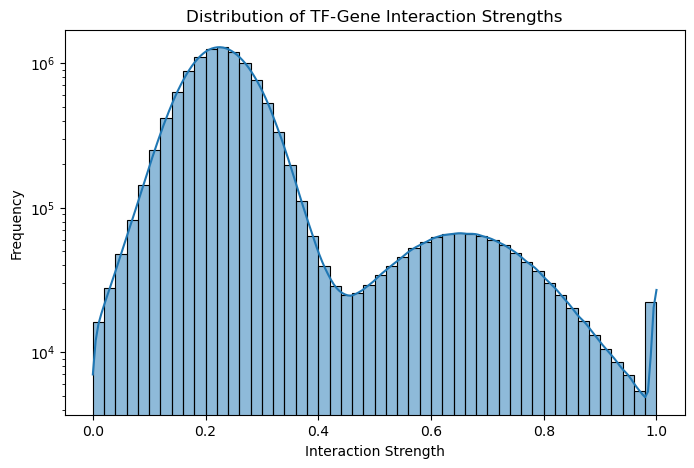

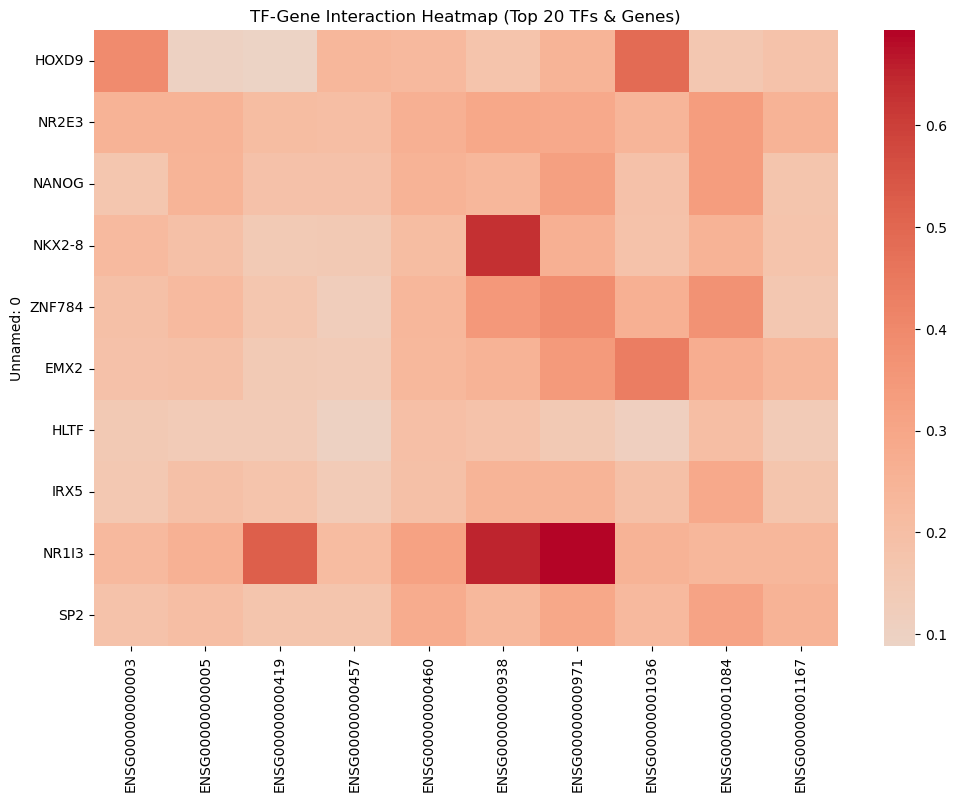

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file (adjusted for gzip compression)
file_path = '/home/pc/Desktop/0_DATASET/BWDFM/data/raw/gene_interaction_network/normalized_data/normalized_Adipose_Subcutaneous.csv.gz'

# Try reading with gzip compression
try:
    df = pd.read_csv(file_path, header=0, index_col=0, compression='gzip', encoding='utf-8')
    print("File loaded successfully with gzip compression.")
except UnicodeDecodeError:
    # If gzip fails, try reading with a different encoding (ISO-8859-1 or latin1)
    print("Gzip compression failed, attempting with ISO-8859-1 encoding.")
    df = pd.read_csv(file_path, header=0, index_col=0, compression='gzip', encoding='ISO-8859-1')

# Print the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nMissing values in dataset: {missing_values}")
if missing_values > 0:
    print("Warning: Dataset contains missing values! Consider handling them before analysis.")

# Convert to NumPy array for efficiency
matrix = df.values  

# Compute summary statistics
num_tfs, num_genes = df.shape
num_interactions = np.count_nonzero(matrix)
num_positive = np.sum(matrix > 0)
num_negative = np.sum(matrix < 0)
num_zero = np.sum(matrix == 0)
sparsity = (num_zero / (num_tfs * num_genes)) * 100
mean_interaction = np.mean(matrix[matrix != 0])
std_interaction = np.std(matrix[matrix != 0])

print("\nSummary Report:")
print(f"Number of Transcription Factors (TFs): {num_tfs}")
print(f"Number of Genes: {num_genes}")
print(f"Total number of interactions: {num_interactions}")
print(f"Number of positive interactions: {num_positive}")
print(f"Number of negative interactions: {num_negative}")
print(f"Number of zero interactions: {num_zero} ({sparsity:.2f}% sparsity)")
print(f"Mean interaction strength (non-zero): {mean_interaction:.4f}")
print(f"Std deviation of interaction strength (non-zero): {std_interaction:.4f}")

# Describe the data to get basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Identify the top 10 TFs with the most interactions
interaction_counts_tfs = (df != 0).sum(axis=1)
top_tfs = interaction_counts_tfs.nlargest(10)

print("\nTop 10 Transcription Factors with Most Interactions:")
print(top_tfs)

# Identify the top 10 genes with the most interactions
interaction_counts_genes = (df != 0).sum(axis=0)
top_genes = interaction_counts_genes.nlargest(10)

print("\nTop 10 Genes with Most Interactions:")
print(top_genes)

# Histogram of interaction strengths (excluding zero)
plt.figure(figsize=(8, 5))
sns.histplot(matrix[matrix != 0], bins=50, kde=True)
plt.xlabel("Interaction Strength")
plt.ylabel("Frequency")
plt.title("Distribution of TF-Gene Interaction Strengths")
plt.yscale("log")  # Log scale for better visibility of lower frequencies
plt.show()

# Heatmap of top 20 TFs and top 20 genes (if applicable)
top_tfs_list = top_tfs.index[:20]
top_genes_list = top_genes.index[:20]

if len(top_tfs_list) > 0 and len(top_genes_list) > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.loc[top_tfs_list, top_genes_list], cmap="coolwarm", center=0, annot=False)
    plt.title("TF-Gene Interaction Heatmap (Top 20 TFs & Genes)")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("Not enough data for heatmap visualization.")
